# Example 1: Learning how to use atmosphere models

PyAAT has five atmosphere models available for use:

1- The International Standard atmosphere - ISA (+ Delta T);

2- The U.S Standard Atmosphere 1976 - COESA (+ Delta T);

3- A simplified model extrated from COOk, 2007;

4- Sea Level model;

5- User specidied (wind tunnel).

Every model provides air density, sound velocity, temperature and air presure as function of the altitude. For the ISA and COESA models, the deviation from the standard surface temperature (15 $^oC$) can also be provided as an imput.

### Importing the models

In [5]:
from pyaat.atmosphere import atmosCOESA, seaLevel, atmosISA, CookModel

MyAtmosphere1 =  atmosISA()
MyAtmosphere1_delta =  atmosISA(deltaT=20)
MyAtmosphere2 =  atmosCOESA(deltaT=0.0 , altitude=0.0)
MyAtmosphere3 =  CookModel()
MyAtmosphere4 =  seaLevel()

### Comparing the models at sea Level

In [6]:
MyAtmosphere1.set_altitude(0.0)
MyAtmosphere1_delta.set_altitude(0.0)
MyAtmosphere2.set_altitude(0.0)
MyAtmosphere3.set_altitude(0.0)
MyAtmosphere4.set_altitude(0.0)

print(r'Air density - ISA model [km/m³]')
print(MyAtmosphere1.get_airDensity())
print('-----------------')
print(r'Air density - ISA + 20 ⁰C [km/m³]')
print(MyAtmosphere1_delta.get_airDensity())
print('-----------------')
print(r'Air density - COESA model [km/m³]')
print(MyAtmosphere2.get_airDensity())
print('-----------------')
print(r'Air density - Cook model [km/m³]')
print(MyAtmosphere3.get_airDensity())
print('-----------------')
print(r'Air density - Sea Level [km/m³]')
print(MyAtmosphere4.get_airDensity())

Air density - ISA model [km/m³]
1.2246977728693844
-----------------
Air density - ISA + 20 ⁰C [km/m³]
1.14521065472112
-----------------
Air density - COESA model [km/m³]
1.225000018124288
-----------------
Air density - Cook model [km/m³]
1.225
-----------------
Air density - Sea Level [km/m³]
1.225


### Comparing the models for a range of altitudes

In [7]:
import numpy as np
altitude_array =  np.arange(0, 86000, 10)

temperature_array1 = []
temperature_array1_delta = []
temperature_array2 = []
temperature_array3 = []
temperature_array4 = []

airDensity_array1 = []
airDensity_array1_delta = []
airDensity_array2 = []
airDensity_array3 = []
airDensity_array4 = []

airPressure_array1 = []
airPressure_array1_delta = []
airPressure_array2 = []
airPressure_array3 = []
airPressure_array4 = []

soundVelocity_array1 = []
soundVelocity_array1_delta = []
soundVelocity_array2 = []
soundVelocity_array3 = []
soundVelocity_array4 = []


for altitude in altitude_array:
    MyAtmosphere1.set_altitude(altitude)
    MyAtmosphere1_delta.set_altitude(altitude)
    MyAtmosphere2.set_altitude(altitude)
    MyAtmosphere3.set_altitude(altitude)
    MyAtmosphere4.set_altitude(altitude)

    temperature_array1.append(MyAtmosphere1.get_temperature())
    temperature_array1_delta.append(MyAtmosphere1_delta.get_temperature())
    temperature_array2.append(MyAtmosphere2.get_temperature())
    temperature_array3.append(MyAtmosphere3.get_temperature())
    temperature_array4.append(MyAtmosphere4.get_temperature())    

    airDensity_array1.append(MyAtmosphere1.get_airDensity())
    airDensity_array1_delta.append(MyAtmosphere1_delta.get_airDensity())
    airDensity_array2.append(MyAtmosphere2.get_airDensity())
    airDensity_array3.append(MyAtmosphere3.get_airDensity())
    airDensity_array4.append(MyAtmosphere4.get_airDensity())

    airPressure_array1.append(MyAtmosphere1.get_airPressure())
    airPressure_array1_delta.append(MyAtmosphere1_delta.get_airPressure())
    airPressure_array2.append(MyAtmosphere2.get_airPressure())
    airPressure_array3.append(MyAtmosphere3.get_airPressure())
    airPressure_array4.append(MyAtmosphere4.get_airPressure())

    soundVelocity_array1.append(MyAtmosphere1.get_soundVelocity())
    soundVelocity_array1_delta.append(MyAtmosphere1_delta.get_soundVelocity())
    soundVelocity_array2.append(MyAtmosphere2.get_soundVelocity())
    soundVelocity_array3.append(MyAtmosphere3.get_soundVelocity())
    soundVelocity_array4.append(MyAtmosphere4.get_soundVelocity())

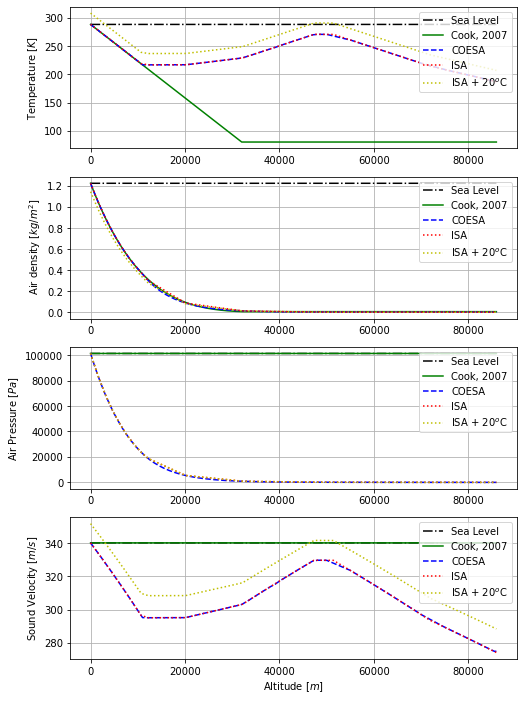

In [8]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=4, ncols=1, sharex=False, figsize=(8,12))
ax[0].plot(altitude_array, temperature_array4, color = 'k', linestyle = 'dashdot', label = r'Sea Level')
ax[0].plot(altitude_array, temperature_array3, color = 'g', linestyle = 'solid', label = r'Cook, 2007')
ax[0].plot(altitude_array, temperature_array2, color = 'b', linestyle = 'dashed', label = r'COESA')
ax[0].plot(altitude_array, temperature_array1, color = 'r', linestyle = 'dotted', label = r'ISA')
ax[0].plot(altitude_array, temperature_array1_delta, color = 'y', linestyle = 'dotted', label = r'ISA + 20$^o$C')
ax[0].set_ylabel(r'Temperature $[K]$')
ax[0].grid()
ax[0].legend(loc='upper right')

ax[1].plot(altitude_array, airDensity_array4, color = 'k', linestyle = 'dashdot', label = r'Sea Level')
ax[1].plot(altitude_array, airDensity_array3, color = 'g', linestyle = 'solid', label = r'Cook, 2007')
ax[1].plot(altitude_array, airDensity_array2, color = 'b', linestyle = 'dashed', label = r'COESA')
ax[1].plot(altitude_array, airDensity_array1, color = 'r', linestyle = 'dotted', label = r'ISA')
ax[1].plot(altitude_array, airDensity_array1_delta, color = 'y', linestyle = 'dotted', label = r'ISA + 20$^o$C')
ax[1].set_ylabel(r' Air density $[kg/m^2]$')
ax[1].grid()
ax[1].legend(loc='upper right')

ax[2].plot(altitude_array, airPressure_array4, color = 'k', linestyle = 'dashdot', label = r'Sea Level')
ax[2].plot(altitude_array, airPressure_array3, color = 'g', linestyle = 'solid', label = r'Cook, 2007')
ax[2].plot(altitude_array, airPressure_array2, color = 'b', linestyle = 'dashed', label = r'COESA')
ax[2].plot(altitude_array, airPressure_array1, color = 'r', linestyle = 'dotted', label = r'ISA')
ax[2].plot(altitude_array, airPressure_array1_delta, color = 'y', linestyle = 'dotted', label = r'ISA + 20$^o$C')
ax[2].set_ylabel(r'Air Pressure $[Pa]$')
ax[2].grid()
ax[2].legend(loc='upper right')

ax[3].plot(altitude_array, soundVelocity_array4, color = 'k', linestyle = 'dashdot', label = r'Sea Level')
ax[3].plot(altitude_array, soundVelocity_array3, color = 'g', linestyle = 'solid', label = r'Cook, 2007')
ax[3].plot(altitude_array, soundVelocity_array2, color = 'b', linestyle = 'dashed', label = r'COESA')
ax[3].plot(altitude_array, soundVelocity_array1, color = 'r', linestyle = 'dotted', label = r'ISA')
ax[3].plot(altitude_array, soundVelocity_array1_delta, color = 'y', linestyle = 'dotted', label = r'ISA + 20$^o$C')
ax[3].set_ylabel(r'Sound Velocity $[m/s]$')
ax[3].set_xlabel(r'Altitude $[m]$')
ax[3].grid()
ax[3].legend(loc='upper right')